In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
ls -lh ../external

total 293M
-rw-rw-r-- 1 Kazuki Kazuki 1.5M Apr  9 07:38 0408-1.csv.gz
-rw-rw-r-- 1 Kazuki Kazuki 960K Apr  9 07:38 913_lgb.csv.gz
-rw-rw-r-- 1 Kazuki Kazuki 1.4M Apr  9 14:03 920_nn.csv.gz
-rw-rw-r-- 1 Kazuki Kazuki 1.5M Apr 10 09:51 929_nn.csv.gz
-rw-rw-r-- 1 Kazuki Kazuki 1.6M Apr 10 09:51 930_lgb.csv.gz
-rw-rw-r-- 1 Kazuki Kazuki 4.5M Apr  9 07:39 concat_lgb_hrd_0407_1.csv
-rw-rw-r-- 1 Kazuki Kazuki 4.5M Apr  9 07:39 concat_lgb_hrd_0408_1.csv
-rw-rw-r-- 1 Kazuki Kazuki 4.4M Apr 10 09:47 king_lgb_925.csv
-rw-rw-r-- 1 Kazuki Kazuki 273M Apr  5 11:04 share_904_oof_preds.pkl.gz


In [3]:
sub_best = pd.merge(pd.read_csv('../input/sample_submission.csv.zip')[['ID_code']],
                    pd.read_csv('../external/king_lgb_925.csv'),
                    on='ID_code', how='left').target

sub_best.name = 'best926'

In [4]:
sub_o = pd.read_csv('../input/sample_submission.csv.zip')

fi_o = sorted(glob('../output/0410-1*.csv.gz'))

for x in fi_o:
    sub_o.target += pd.read_csv(x).target.rank()

sub_o = sub_o.target.rank(pct=1)

sub_o.name = 'onodera_lgb10fold10ave'

In [5]:
sub_h = pd.read_csv('../input/sample_submission.csv.zip')

fi_h = sorted(glob('../output/0410-2*.csv.gz'))

for x in fi_h:
    sub_h.target += pd.read_csv(x).target.rank()

sub_h = sub_h.target.rank(pct=1)

sub_h.name = 'harada_lgb10fold10ave'

In [6]:
sub_a_nn = pd.read_csv('../external/929_nn.csv.gz').target
sub_a_nn.name = 'akiyama_nn10ave'

In [7]:
sub_a_lgb = pd.read_csv('../external/930_lgb.csv.gz').target
sub_a_lgb.name = 'akiyama_lgb10ave'

In [8]:
subs = pd.concat([sub_best, sub_o, sub_h, sub_a_nn, sub_a_lgb], axis=1).drop(np.load('../data/fake_index.npy'))

In [9]:
hm = subs.rank().corr()

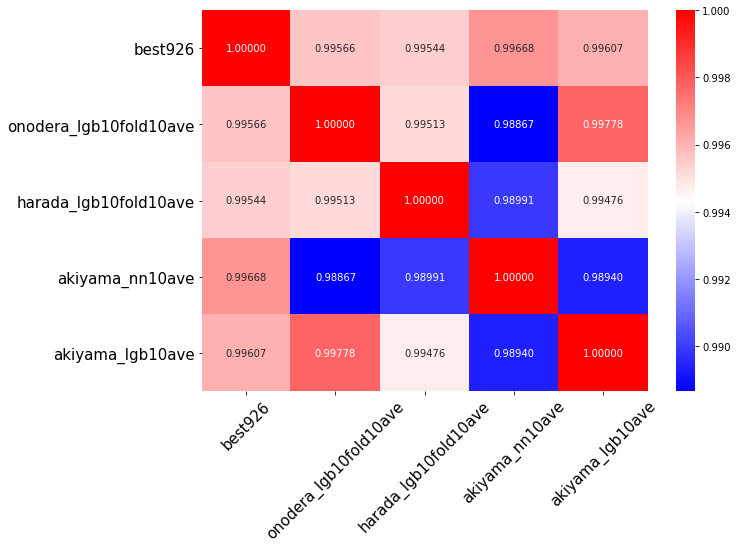

In [10]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(hm, annot=True, annot_kws={'fontsize':10}, fmt='.5f', cmap='bwr')
plt.yticks(fontsize=15, rotation=0)
plt.xticks(fontsize=15, rotation=45)
plt.show()
